In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("train.csv",low_memory=False)
df.head()

,ID,vendor+AF8-id,pickup+AF8-loc,drop+AF8-loc,driver+AF8-tip,mta+AF8-tax,distance,pickup+AF8-time,drop+AF8-time,num+AF8-passengers,toll+AF8-amount,payment+AF8-method,rate+AF8-code,stored+AF8-flag,extra+AF8-charges,improvement+AF8-charge,total+AF8-amount
0,0,1,170.0,233.0,1.83,0.5,0.70,04/04/2017 05:59:43 PM,04/04/2017 06:05:04 PM,1.0,0,1.0,1.0,N,1,0.3,9.13
1,1,2,151.0,243.0,3.56,0.5,4.64,04/03/2017 07:03:34 PM,04/03/2017 07:20:04 PM,1.0,0,1.0,1.0,N,1,0.3,21.36
2,2,2,68.0,90.0,1.5,0.5,1.29,04/03/2017 03:06:13 PM,04/03/2017 03:12:30 PM,2.0,0,1.0,1.0,N,0,0.3,8.8
3,3,2,142.0,234.0,1.5,0.5,2.74,04/04/2017 08:10:52 AM,04/04/2017 08:27:00 AM,1.0,0,1.0,1.0,N,0,0.3,14.8
4,4,2,238.0,238.0,0,0.5,0.45,04/05/2017 02:02:59 PM,04/05/2017 02:05:41 PM,6.0,0,2.0,1.0,N,0,0.3,4.8


#### Data cleaning

In [3]:
for i in df.columns:
    df=df.rename(columns={i:i.replace("+AF8-","_")})

In [4]:
df.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount
0,0,1,170.0,233.0,1.83,0.5,0.70,04/04/2017 05:59:43 PM,04/04/2017 06:05:04 PM,1.0,0,1.0,1.0,N,1,0.3,9.13
1,1,2,151.0,243.0,3.56,0.5,4.64,04/03/2017 07:03:34 PM,04/03/2017 07:20:04 PM,1.0,0,1.0,1.0,N,1,0.3,21.36
2,2,2,68.0,90.0,1.5,0.5,1.29,04/03/2017 03:06:13 PM,04/03/2017 03:12:30 PM,2.0,0,1.0,1.0,N,0,0.3,8.8
3,3,2,142.0,234.0,1.5,0.5,2.74,04/04/2017 08:10:52 AM,04/04/2017 08:27:00 AM,1.0,0,1.0,1.0,N,0,0.3,14.8
4,4,2,238.0,238.0,0,0.5,0.45,04/05/2017 02:02:59 PM,04/05/2017 02:05:41 PM,6.0,0,2.0,1.0,N,0,0.3,4.8


In [5]:
df['pickup_time'] = pd.to_datetime(df['pickup_time'], format='%m/%d/%Y %I:%M:%S %p')
df['drop_time'] = pd.to_datetime(df['drop_time'], format='%m/%d/%Y %I:%M:%S %p')

In [6]:
df.dtypes

ID                             int64
vendor_id                     object
pickup_loc                   float64
drop_loc                     float64
driver_tip                    object
mta_tax                       object
distance                     float64
pickup_time           datetime64[ns]
drop_time             datetime64[ns]
num_passengers               float64
toll_amount                   object
payment_method               float64
rate_code                    float64
stored_flag                   object
extra_charges                 object
improvement_charge            object
total_amount                  object
dtype: object

In [7]:
df.isna().sum()

ID                    0
vendor_id             0
pickup_loc            1
drop_loc              1
driver_tip            2
mta_tax               1
distance              1
pickup_time           1
drop_time             1
num_passengers        1
toll_amount           2
payment_method        1
rate_code             1
stored_flag           1
extra_charges         1
improvement_charge    2
total_amount          2
dtype: int64

In [8]:
df.dropna(axis=0, inplace=True)


In [9]:
df.isna().sum()

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
pickup_time           0
drop_time             0
num_passengers        0
toll_amount           0
payment_method        0
rate_code             0
stored_flag           0
extra_charges         0
improvement_charge    0
total_amount          0
dtype: int64

###### N and Y cant convert to float so im using onehotencoder

In [10]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
df['stored_flag']=Le.fit_transform(df['stored_flag'])
print(dict(enumerate(Le.classes_)))
df.head()

{0: 'N', 1: 'Y'}


,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount
0,0,1,170.0,233.0,1.83,0.5,0.70,2017-04-04 17:59:43,2017-04-04 18:05:04,1.0,0,1.0,1.0,0,1,0.3,9.13
1,1,2,151.0,243.0,3.56,0.5,4.64,2017-04-03 19:03:34,2017-04-03 19:20:04,1.0,0,1.0,1.0,0,1,0.3,21.36
2,2,2,68.0,90.0,1.5,0.5,1.29,2017-04-03 15:06:13,2017-04-03 15:12:30,2.0,0,1.0,1.0,0,0,0.3,8.8
3,3,2,142.0,234.0,1.5,0.5,2.74,2017-04-04 08:10:52,2017-04-04 08:27:00,1.0,0,1.0,1.0,0,0,0.3,14.8
4,4,2,238.0,238.0,0,0.5,0.45,2017-04-05 14:02:59,2017-04-05 14:05:41,6.0,0,2.0,1.0,0,0,0.3,4.8


In [11]:
import pandas as pd

object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].apply(pd.to_numeric, errors='coerce')

print(df.dtypes)


ID                             int64
vendor_id                      int64
pickup_loc                   float64
drop_loc                     float64
driver_tip                   float64
mta_tax                      float64
distance                     float64
pickup_time           datetime64[ns]
drop_time             datetime64[ns]
num_passengers               float64
toll_amount                  float64
payment_method               float64
rate_code                    float64
stored_flag                    int32
extra_charges                float64
improvement_charge           float64
total_amount                 float64
dtype: object


In [12]:
df.isna().sum()

ID                      0
vendor_id               0
pickup_loc              0
drop_loc                0
driver_tip             12
mta_tax               505
distance                0
pickup_time             0
drop_time               0
num_passengers          0
toll_amount             2
payment_method          0
rate_code               0
stored_flag             0
extra_charges         224
improvement_charge    521
total_amount          521
dtype: int64

In [13]:
df.dropna(axis=0,inplace=True)
df.isna().sum()

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
pickup_time           0
drop_time             0
num_passengers        0
toll_amount           0
payment_method        0
rate_code             0
stored_flag           0
extra_charges         0
improvement_charge    0
total_amount          0
dtype: int64

In [14]:
df.describe()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount
count,1.048052e+06,1.048052e+06,1.048052e+06,1.048052e+06,1.048052e+06,1.048052e+06,1.048052e+06,1048052,1048052,1.048052e+06,1.048052e+06,1.048052e+06,1.048052e+06,1.048052e+06,1.048052e+06,1.048052e+06,1.048052e+06
mean,5.242770e+05,1.541237e+00,1.648092e+02,1.626690e+02,1.896134e+00,4.974939e-01,2.861120e+00,2017-04-05 18:17:15.109459200,2017-04-05 18:33:25.186878976,1.590534e+00,3.460139e-01,1.316956e+00,1.043287e+00,6.840309e-03,3.415192e-01,2.999187e-01,1.623075e+01
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2017-04-03 06:53:27,2017-04-03 06:55:04,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.621408e+05,1.000000e+00,1.250000e+02,1.130000e+02,0.000000e+00,5.000000e-01,9.300000e-01,2017-04-04 11:24:37.750000128,2017-04-04 11:41:49,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.000000e-01,8.500000e+00
50%,5.242765e+05,2.000000e+00,1.620000e+02,1.620000e+02,1.450000e+00,5.000000e-01,1.600000e+00,2017-04-05 14:18:17.500000,2017-04-05 14:36:09,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.000000e-01,1.176000e+01
75%,7.864112e+05,2.000000e+00,2.330000e+02,2.330000e+02,2.450000e+00,5.000000e-01,2.900000e+00,2017-04-06 15:05:50.249999872,2017-04-06 15:24:44,2.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,5.000000e-01,3.000000e-01,1.775000e+01
max,1.048574e+06,2.000000e+00,2.650000e+02,2.650000e+02,4.000000e+02,5.000000e-01,1.138000e+02,2017-04-30 19:17:29,2017-05-01 19:11:22,9.000000e+00,9.057600e+02,4.000000e+00,9.900000e+01,1.000000e+00,6.500000e+00,3.000000e-01,2.759370e+03
std,3.026912e+05,4.982968e-01,6.579178e+01,6.953270e+01,2.654248e+00,3.530949e-02,3.710009e+00,NaN,NaN,1.253552e+00,2.138926e+00,4.833031e-01,5.619886e-01,8.242285e-02,4.837185e-01,4.937764e-03,1.508402e+01


In [15]:
df['hours'] = df.apply(lambda row: (row['drop_time'] - row['pickup_time']).total_seconds()/60, axis=1)
df['hours']

0           5.350000
1          16.500000
2           6.283333
3          16.133333
4           2.700000
             ...    
1048570     7.916667
1048571    23.283333
1048572    13.366667
1048573    12.783333
1048574     2.766667
Name: hours, Length: 1048052, dtype: float64

In [16]:
df.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount,hours
0,0,1,170.0,233.0,1.83,0.5,0.70,2017-04-04 17:59:43,2017-04-04 18:05:04,1.0,0.0,1.0,1.0,0,1.0,0.3,9.13,5.350000
1,1,2,151.0,243.0,3.56,0.5,4.64,2017-04-03 19:03:34,2017-04-03 19:20:04,1.0,0.0,1.0,1.0,0,1.0,0.3,21.36,16.500000
2,2,2,68.0,90.0,1.50,0.5,1.29,2017-04-03 15:06:13,2017-04-03 15:12:30,2.0,0.0,1.0,1.0,0,0.0,0.3,8.80,6.283333
3,3,2,142.0,234.0,1.50,0.5,2.74,2017-04-04 08:10:52,2017-04-04 08:27:00,1.0,0.0,1.0,1.0,0,0.0,0.3,14.80,16.133333
4,4,2,238.0,238.0,0.00,0.5,0.45,2017-04-05 14:02:59,2017-04-05 14:05:41,6.0,0.0,2.0,1.0,0,0.0,0.3,4.80,2.700000


#### Data visualisation

In [17]:
df[['vendor_id','total_amount']].groupby('vendor_id').mean().reset_index()

,vendor_id,total_amount
0,1,15.974330
1,2,16.448102


###### we can see that both have similar contibution

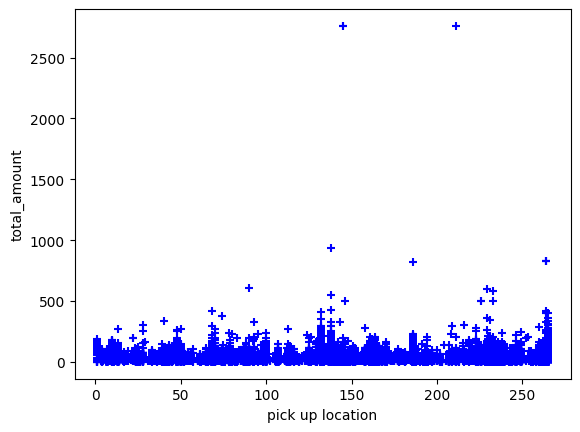

In [18]:
%matplotlib inline
plt.scatter(df['pickup_loc'],df['total_amount'],color='blue',marker='+')
plt.xlabel('pick up location')
plt.ylabel('total_amount')
plt.show()

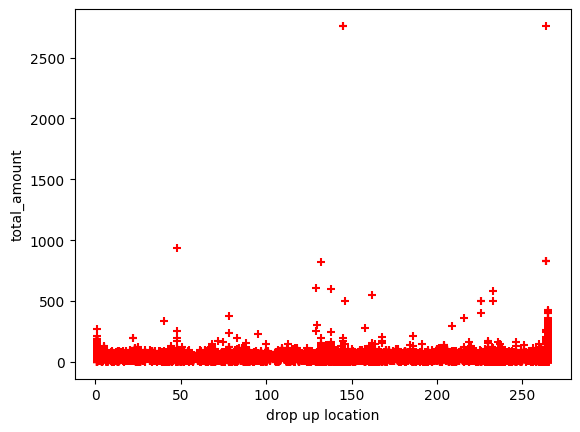

In [19]:
plt.scatter(df['drop_loc'],df['total_amount'],color='red',marker='+')
plt.xlabel('drop up location')
plt.ylabel('total_amount')
plt.show()

###### from above obseravtion can see that total amount have same range for different locations

In [20]:
df.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount,hours
0,0,1,170.0,233.0,1.83,0.5,0.70,2017-04-04 17:59:43,2017-04-04 18:05:04,1.0,0.0,1.0,1.0,0,1.0,0.3,9.13,5.350000
1,1,2,151.0,243.0,3.56,0.5,4.64,2017-04-03 19:03:34,2017-04-03 19:20:04,1.0,0.0,1.0,1.0,0,1.0,0.3,21.36,16.500000
2,2,2,68.0,90.0,1.50,0.5,1.29,2017-04-03 15:06:13,2017-04-03 15:12:30,2.0,0.0,1.0,1.0,0,0.0,0.3,8.80,6.283333
3,3,2,142.0,234.0,1.50,0.5,2.74,2017-04-04 08:10:52,2017-04-04 08:27:00,1.0,0.0,1.0,1.0,0,0.0,0.3,14.80,16.133333
4,4,2,238.0,238.0,0.00,0.5,0.45,2017-04-05 14:02:59,2017-04-05 14:05:41,6.0,0.0,2.0,1.0,0,0.0,0.3,4.80,2.700000


In [21]:
df['driver_tip'].nunique()

2135

In [22]:
temp=df[['driver_tip','total_amount']].groupby('driver_tip').sum().reset_index()
temp

,driver_tip,total_amount
0,0.00,4734379.32
1,0.01,6101.13
2,0.02,1905.80
3,0.03,679.88
4,0.04,348.48
...,...,...
2130,173.00,179.06
2131,185.00,188.80
2132,196.00,222.85
2133,200.00,216.56


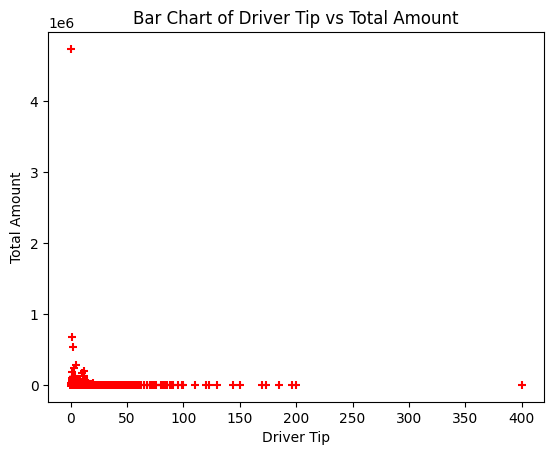

In [23]:
plt.scatter(temp['driver_tip'], temp['total_amount'], color='red',marker='+')
plt.xlabel('Driver Tip')
plt.ylabel('Total Amount')
plt.title('Bar Chart of Driver Tip vs Total Amount')
plt.show()


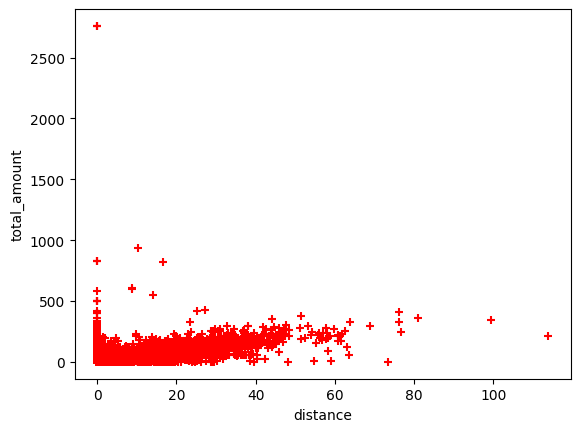

In [24]:
plt.scatter(df['distance'],df['total_amount'],color='red',marker='+')
plt.xlabel('distance')
plt.ylabel('total_amount')
plt.show()

In [25]:
df['mta_tax'].value_counts()

mta_tax
0.5    1042799
0.0       5253
Name: count, dtype: int64

In [26]:
df[['mta_tax','total_amount']].groupby('mta_tax').mean()

,total_amount
mta_tax,
0.0,78.790885
0.5,15.915612


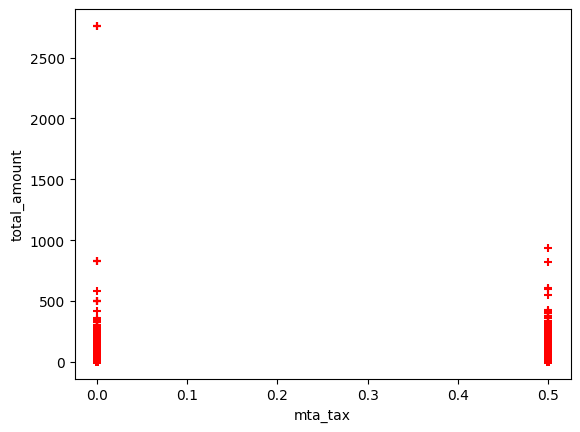

In [27]:
plt.scatter(df['mta_tax'],df['total_amount'],color='red',marker='+')
plt.xlabel('mta_tax')
plt.ylabel('total_amount')
plt.show()

In [28]:
df['num_passengers'].value_counts()

num_passengers
1.0    774129
2.0    137929
5.0     49499
3.0     38273
6.0     30954
4.0     17209
0.0        46
7.0         6
8.0         4
9.0         3
Name: count, dtype: int64

In [29]:
temp=df[['num_passengers','total_amount']].groupby('num_passengers').mean().sort_values(by='total_amount',ascending=False).reset_index()

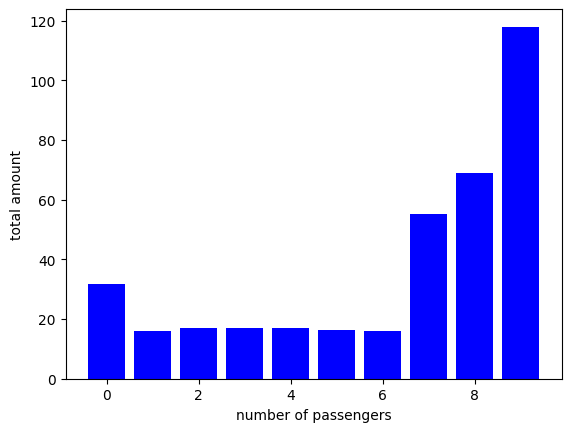

In [30]:
%matplotlib inline
plt.bar(temp['num_passengers'],temp['total_amount'],color='blue')
plt.xlabel('number of passengers')
plt.ylabel('total amount')
plt.show()

In [31]:
df.head(2)

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount,hours
0,0,1,170.0,233.0,1.83,0.5,0.70,2017-04-04 17:59:43,2017-04-04 18:05:04,1.0,0.0,1.0,1.0,0,1.0,0.3,9.13,5.35
1,1,2,151.0,243.0,3.56,0.5,4.64,2017-04-03 19:03:34,2017-04-03 19:20:04,1.0,0.0,1.0,1.0,0,1.0,0.3,21.36,16.50


In [32]:
df['toll_amount'].nunique()

417

In [33]:
temp=df[['toll_amount','total_amount']].groupby('toll_amount').mean().sort_values(by='total_amount',ascending=False).reset_index()
temp

,toll_amount,total_amount
0,905.76,939.560000
1,765.34,818.140000
2,575.09,605.390000
3,571.32,598.120000
4,405.84,546.170000
...,...,...
412,0.00,13.915062
413,2.70,12.000000
414,0.30,11.600000
415,2.20,9.000000


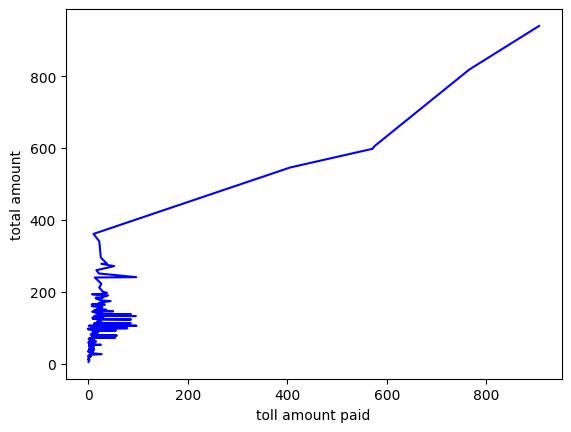

In [34]:
%matplotlib inline
plt.plot(temp['toll_amount'],temp['total_amount'],color='blue')
plt.xlabel('toll amount paid')
plt.ylabel('total amount')
plt.show()

In [35]:
df.head(2)

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount,hours
0,0,1,170.0,233.0,1.83,0.5,0.70,2017-04-04 17:59:43,2017-04-04 18:05:04,1.0,0.0,1.0,1.0,0,1.0,0.3,9.13,5.35
1,1,2,151.0,243.0,3.56,0.5,4.64,2017-04-03 19:03:34,2017-04-03 19:20:04,1.0,0.0,1.0,1.0,0,1.0,0.3,21.36,16.50


In [36]:
df['payment_method'].value_counts()

payment_method
1.0    723464
2.0    318346
3.0      4886
4.0      1356
Name: count, dtype: int64

In [37]:
temp=df[['payment_method','total_amount']].groupby('payment_method').mean().sort_values(by='total_amount',ascending=False).reset_index()
temp

,payment_method,total_amount
0,1.0,17.600822
1,4.0,16.167928
2,3.0,15.498238
3,2.0,13.128684


In [38]:
df['rate_code'].value_counts()

rate_code
1.0     1019160
2.0       22302
5.0        3415
3.0        2513
4.0         628
99.0         25
6.0           9
Name: count, dtype: int64

In [39]:
temp=df[['rate_code','total_amount']].groupby('rate_code').mean().sort_values(by='rate_code',ascending=True).reset_index()
temp

,rate_code,total_amount
0,1.0,14.720476
1,2.0,65.475706
2,3.0,92.766236
3,4.0,92.141640
4,5.0,75.004782
5,6.0,3.633333
6,99.0,30.116400


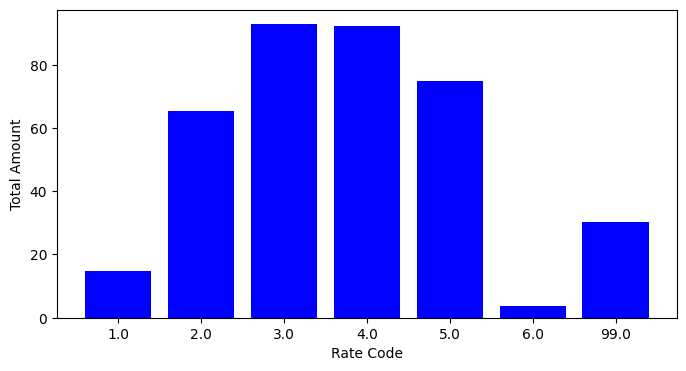

In [40]:
x_ticks = range(1, len(temp['rate_code']) + 1) 
x_labels = temp['rate_code'] 

plt.figure(figsize=(8, 4))
plt.bar(x_ticks, temp['total_amount'], color='blue')
plt.xlabel('Rate Code')
plt.ylabel('Total Amount')
plt.xticks(x_ticks, x_labels) 
plt.show()

In [41]:
df['stored_flag'].value_counts()


stored_flag
0    1040883
1       7169
Name: count, dtype: int64

In [42]:
temp=df[['stored_flag','total_amount']].groupby('stored_flag').mean().sort_values(by='total_amount',ascending=False).reset_index()
temp

,stored_flag,total_amount
0,1,24.107778
1,0,16.176501


In [43]:
df['extra_charges'].value_counts()

extra_charges
0.00    573404
0.50    267377
1.00    202414
4.50      4847
1.80         3
0.80         1
0.05         1
6.50         1
1.50         1
0.20         1
0.10         1
1.30         1
Name: count, dtype: int64

In [44]:
temp=df[['extra_charges','total_amount']].groupby('extra_charges').mean().sort_values(by='total_amount',ascending=False).reset_index()
temp

,extra_charges,total_amount
0,4.50,68.798191
1,0.80,39.600000
2,6.50,16.450000
3,0.00,16.387083
4,0.50,15.788245
5,1.00,15.113850
6,1.80,11.933333
7,0.20,10.200000
8,1.30,7.600000
9,1.50,4.800000


In [45]:
df.head(2)

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount,hours
0,0,1,170.0,233.0,1.83,0.5,0.70,2017-04-04 17:59:43,2017-04-04 18:05:04,1.0,0.0,1.0,1.0,0,1.0,0.3,9.13,5.35
1,1,2,151.0,243.0,3.56,0.5,4.64,2017-04-03 19:03:34,2017-04-03 19:20:04,1.0,0.0,1.0,1.0,0,1.0,0.3,21.36,16.50


In [46]:
df['improvement_charge'].value_counts()

improvement_charge
0.3    1047768
0.0        284
Name: count, dtype: int64

In [47]:
temp=df[['improvement_charge','total_amount']].groupby('improvement_charge').mean().sort_values(by='total_amount',ascending=False).reset_index()
temp

,improvement_charge,total_amount
0,0.0,22.470880
1,0.3,16.229062


In [48]:
df.drop(['improvement_charge'],axis=1,inplace=True)

In [49]:
df['hours'].nunique()

7270

In [50]:
temp=df[['hours','total_amount']].groupby('hours').mean().sort_values(by='total_amount',ascending=False).reset_index()
temp

,hours,total_amount
0,122.150000,407.18
1,581.000000,380.80
2,192.816667,361.56
3,125.000000,340.65
4,81.883333,295.86
...,...,...
7265,1398.683333,3.30
7266,1439.366667,2.90
7267,1049.433333,1.80
7268,116.683333,0.31


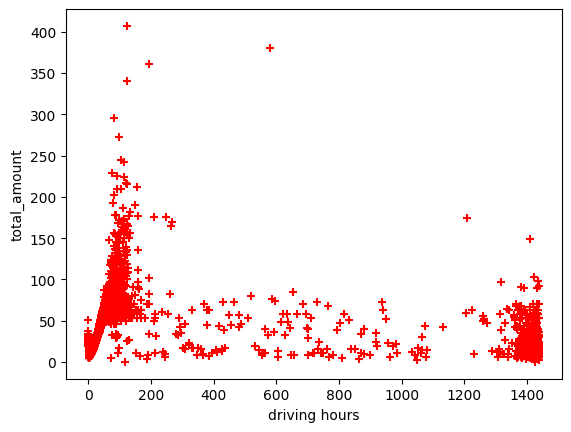

In [51]:
%matplotlib inline
plt.scatter(temp['hours'],temp['total_amount'],color='red',marker='+')
plt.xlabel('driving hours')
plt.ylabel('total_amount')
plt.show()

In [52]:
df.head(2)

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,total_amount,hours
0,0,1,170.0,233.0,1.83,0.5,0.70,2017-04-04 17:59:43,2017-04-04 18:05:04,1.0,0.0,1.0,1.0,0,1.0,9.13,5.35
1,1,2,151.0,243.0,3.56,0.5,4.64,2017-04-03 19:03:34,2017-04-03 19:20:04,1.0,0.0,1.0,1.0,0,1.0,21.36,16.50


In [53]:
df.drop(['pickup_time', "drop_time",'ID', "vendor_id", "drop_loc", "pickup_loc", "stored_flag", "mta_tax"], axis = 1, inplace = True) 

In [54]:
X=df.drop(['total_amount'],axis=1)
X.head()

,driver_tip,distance,num_passengers,toll_amount,payment_method,rate_code,extra_charges,hours
0,1.83,0.70,1.0,0.0,1.0,1.0,1.0,5.350000
1,3.56,4.64,1.0,0.0,1.0,1.0,1.0,16.500000
2,1.50,1.29,2.0,0.0,1.0,1.0,0.0,6.283333
3,1.50,2.74,1.0,0.0,1.0,1.0,0.0,16.133333
4,0.00,0.45,6.0,0.0,2.0,1.0,0.0,2.700000


In [55]:
y=df['total_amount']
y.head()

0     9.13
1    21.36
2     8.80
3    14.80
4     4.80
Name: total_amount, dtype: float64

#### Selecting a model

In [56]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.075,random_state=42)

In [57]:
model = XGBRegressor(max_depth=8, n_estimators = 750, learning_rate= 0.025,random_state=42)
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.025, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=750, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [58]:
model.score(X_train,y_train)

0.9428638058846274

In [59]:
model.score(X_test,y_test)

0.9510199584924847

In [60]:
y_pred=model.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 9.851500937360274


In [62]:
import joblib
joblib.dump(model,'Predict_fair')

['Predict_fair']

# Cleaning the test data to fit into the model and predicting the fair fee of test data


In [74]:
test_df=pd.read_csv("test.csv")

In [75]:
test_df.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge
0,0,1,68.0,186.0,1.00,0.5,0.70,04/05/2017 05:49:46 AM,04/05/2017 05:54:03 AM,1.0,0.0,1.0,1.0,N,0.5,0.3
1,1,1,170.0,161.0,2.55,0.5,1.00,04/07/2017 08:57:27 AM,04/07/2017 09:16:00 AM,1.0,0.0,1.0,1.0,N,0.0,0.3
2,2,2,13.0,246.0,2.96,0.5,3.35,04/06/2017 08:06:41 AM,04/06/2017 08:21:33 AM,2.0,0.0,1.0,1.0,N,0.0,0.3
3,3,1,170.0,233.0,2.00,0.5,0.80,04/04/2017 08:31:34 AM,04/04/2017 08:37:21 AM,2.0,0.0,1.0,1.0,N,0.0,0.3
4,4,1,237.0,236.0,1.00,0.5,0.70,04/07/2017 10:54:06 AM,04/07/2017 11:00:59 AM,1.0,0.0,1.0,1.0,Y,0.0,0.3


In [76]:
test_df['pickup_time'] = pd.to_datetime(test_df['pickup_time'], format='%m/%d/%Y %I:%M:%S %p')
test_df['drop_time'] = pd.to_datetime(test_df['drop_time'], format='%m/%d/%Y %I:%M:%S %p')

In [77]:
test_df.dropna(axis=0, inplace=True)
test_df.isna().sum()

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
pickup_time           0
drop_time             0
num_passengers        0
toll_amount           0
payment_method        0
rate_code             0
stored_flag           0
extra_charges         0
improvement_charge    0
dtype: int64

In [78]:
test_df['hours'] = test_df.apply(lambda row: (row['drop_time'] - row['pickup_time']).total_seconds()/60, axis=1)
test_df['hours']

0          4.283333
1         18.550000
2         14.866667
3          5.783333
4          6.883333
            ...    
154230    16.000000
154231     7.000000
154232     4.750000
154233    13.366667
154234    16.900000
Name: hours, Length: 154235, dtype: float64

In [81]:
test_df.drop(['improvement_charge','pickup_time', "drop_time",'ID', "vendor_id", "drop_loc", "pickup_loc", "stored_flag" ,"mta_tax"], axis = 1, inplace = True) 

In [83]:
object_columns = test_df.select_dtypes(include=['object']).columns
test_df[object_columns] = test_df[object_columns].apply(pd.to_numeric, errors='coerce')

print(test_df.dtypes)


driver_tip        float64
distance          float64
num_passengers    float64
toll_amount       float64
payment_method    float64
rate_code         float64
extra_charges     float64
hours             float64
dtype: object


In [82]:
test_df.head()

,driver_tip,distance,num_passengers,toll_amount,payment_method,rate_code,extra_charges,hours
0,1.00,0.70,1.0,0.0,1.0,1.0,0.5,4.283333
1,2.55,1.00,1.0,0.0,1.0,1.0,0.0,18.550000
2,2.96,3.35,2.0,0.0,1.0,1.0,0.0,14.866667
3,2.00,0.80,2.0,0.0,1.0,1.0,0.0,5.783333
4,1.00,0.70,1.0,0.0,1.0,1.0,0.0,6.883333


In [72]:
df.head()

,driver_tip,distance,num_passengers,toll_amount,payment_method,rate_code,extra_charges,total_amount,hours
0,1.83,0.70,1.0,0.0,1.0,1.0,1.0,9.13,5.350000
1,3.56,4.64,1.0,0.0,1.0,1.0,1.0,21.36,16.500000
2,1.50,1.29,2.0,0.0,1.0,1.0,0.0,8.80,6.283333
3,1.50,2.74,1.0,0.0,1.0,1.0,0.0,14.80,16.133333
4,0.00,0.45,6.0,0.0,2.0,1.0,0.0,4.80,2.700000


In [86]:
test_model=joblib.load('Predict_fair')

In [87]:
test_model.predict(test_df)

array([ 7.2940354, 15.160851 , 17.553278 , ...,  9.361957 , 14.263623 ,
       15.968244 ], dtype=float32)